In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import math

Load data

In [4]:
data = pd.read_csv('data/data.csv', sep=',', header=0)
x_data = data.drop(['id', 'time', 'lat', 'lon'],axis=1) # drop lat lon, time
y_data = data[[ 'time', 'id', 'lat', 'lon']]

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

Define custom evaluation function

In [9]:
distance_between_sectors = pd.read_csv('my_data/distance_between_sector.csv', sep=',', header=0)

def custom():
    correct = 0

    for index, row in enumerate(X_test):
        distance = distance_between_sectors.loc[distance_between_sectors['id'] == y_test.iloc[[index]]['id'].values[0], str('{:.0f}'.format(classifier.predict(X_test[[index]])[0]))].values[0]
        if distance == 0:
            correct = correct + 1
        elif distance >= 1 and distance < 2:
            correct = correct + 0.7
        elif distance >= 2 and distance < 3:
            correct = correct + 0.4
        elif distance >= 3 and distance < 4:
            correct = correct + 0.1

    accuracy = correct/len(X_test)
    return(accuracy)

Collect accuracy with different classifiers parameters

In [10]:
accuracy = []
accuracy_svm = []
custom_acc = []
custom_svm = []
custom_wknn = []
custom_wknn_p = []
wknn = []
wknn_p = []
k = []

best = 0
highest = 0
p = Pipeline([('s', StandardScaler()),
            ('c', svm.LinearSVC(tol=1e-1, max_iter=1000))])
p.fit(X_train, y_train['id'])

svm_score = p.score(X_test, y_test['id']) * 100
for i in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors=i, metric='minkowski', weights='distance', p=2, algorithm='auto')
    classifier.fit(X_train, y_train['id'])
    score = classifier.score(X_test, y_test['id'])
    wknn.append(score*100)
    custom_wknn.append(custom()*100)
    
    classifier = KNeighborsClassifier(n_neighbors=i, metric='minkowski', weights='distance', p=1, algorithm='auto')
    classifier.fit(X_train, y_train['id'])
    score = classifier.score(X_test, y_test['id'])
    wknn_p.append(score*100)
    custom_wknn_p.append(custom()*100)
    
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train['id'])
    score = classifier.score(X_test, y_test['id'])
    k.append(i)
    accuracy.append(score*100)
    accuracy_svm.append(svm_score)
    
    custom_acc.append(custom()*100)
    custom_svm.append(49)
    if score > highest:
        best = i
        highest = score


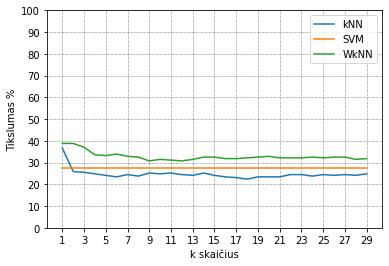

In [11]:
plt.plot(k, accuracy, label='kNN')
plt.plot(k, accuracy_svm, label='SVM')
plt.plot(k, wknn_p, label='WkNN')
#plt.plot(k, wknn, label='WkNN - Euklido atstumas')
#plt.plot(k, custom_acc, label='kNN')
#plt.plot(k, custom_svm, label='SVM')
#plt.plot(k, custom_wknn_p, label='WkNN')
plt.xlabel("k skaičius")
plt.ylabel("Tikslumas %")
plt.grid(color='black', linestyle='dotted', linewidth=0.5)
plt.xticks(np.arange(min(k), max(k)+1, 2.0))
plt.yticks(np.arange(0, 105, 10))
plt.legend()
plt.show()